In [1]:
import sys
sys.path.append('../../sparsedense')

In [47]:
import numpy as np
import networkx as nx
from networkx.algorithms.approximation import clustering_coefficient

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [48]:
import sparsedensefast as sd

In [49]:
def clustering_stats(K, alpha, sigma, c):
    Z = sd.sample_from_ibp(K=K, alpha=alpha, sigma=sigma, c=c)
    adj = Z.transpose() @ Z
    g = nx.from_scipy_sparse_matrix(adj)
    for n in g.nodes():
        g.remove_edge(n, n)
    num_triangles = sum(nx.triangles(g).values())
    mean_triangles = num_triangles / g.number_of_nodes()
    clustering_coeff = clustering_coefficient.average_clustering(g)
    num_nodes = g.number_of_nodes()
    num_edges = g.number_of_edges()
    mean_deg = 2.0 * num_edges / num_nodes
    
    return num_triangles, mean_triangles, clustering_coeff, num_nodes, num_edges, mean_deg

In [50]:
def generate_stats(Klist, nreps, alpha, sigma, c):
    nk = len(Klist)
    numtr = np.zeros((nk, nreps), dtype=int)
    meantr = np.zeros((nk, nreps))
    clustco = np.zeros((nk, nreps))
    nedges = np.zeros((nk, nreps), dtype=int)
    nnodes = np.zeros((nk, nreps), dtype=int)
    meandeg = np.zeros((nk, nreps))

    for r in range(nreps):
        for i, K in enumerate(Klist):
            numtr[i, r], meantr[i, r], clustco[i, r], nnodes[i, r], nedges[i, r], meandeg[i, r] = clustering_stats(K, alpha, sigma, c)
            print("Finished rep {:2d} with K: {:6d} nt: {:7d}  mt: {:7.2f} cc: {:.2f} nv: {:6d} ne: {:7d} deg: {:.2f}"
                  .format(r + 1, K, numtr[i, r], meantr[i, r], clustco[i, r], nnodes[i, r], nedges[i, r], meandeg[i, r]))
    
    return numtr, meantr, clustco, nnodes, nedges, meandeg

# Experiments

In [14]:
alpha = 7
sigma_list = [0.1, 0.25, 0.5, 0.75, 0.9]
# sigma_list = [0.9]
c = 5.0
Klist = [int(10 ** x) for x in np.linspace(2, 5, 7)]
nreps = 25

for sigma in sigma_list[0:1]:
    print("================== sigma:", str(sigma), "=============================")
    num_triang, mean_triang, clust_coeff, num_nodes, num_edges, mean_deg = generate_stats(Klist, nreps, alpha, sigma, c)
    filename = 'stats_sigma_0_{}.pkl'.format(str(sigma)[2:])
    with open(filename, 'wb') as fn:
        pickle.dump((num_triang, mean_triang, clust_coeff, num_nodes, num_edges, mean_deg), fn)

================== sigma: 0.1 =============================
Finished rep  1 with K:    100 nt:   14931  mt:  169.67 cc: 0.77 nv:     88 ne:     910 deg: 20.68
Finished rep  1 with K:    316 nt:   28791  mt:  210.15 cc: 0.77 nv:    137 ne:    1456 deg: 21.26
Finished rep  1 with K:   1000 nt:   98652  mt:  563.73 cc: 0.79 nv:    175 ne:    3025 deg: 34.57
Finished rep  1 with K:   3162 nt:  143379  mt:  640.08 cc: 0.82 nv:    224 ne:    3797 deg: 33.90
Finished rep  1 with K:  10000 nt:  497439  mt: 1782.94 cc: 0.86 nv:    279 ne:    7961 deg: 57.07
Finished rep  1 with K:  31622 nt: 1252455  mt: 3412.68 cc: 0.86 nv:    367 ne:   13945 deg: 75.99
Finished rep  1 with K: 100000 nt: 1539231  mt: 3498.25 cc: 0.88 nv:    440 ne:   16546 deg: 75.21
Finished rep  2 with K:    100 nt:    2997  mt:   34.85 cc: 0.72 nv:     86 ne:     444 deg: 10.33
Finished rep  2 with K:    316 nt:   35190  mt:  260.67 cc: 0.79 nv:    135 ne:    1617 deg: 23.96
Finished rep  2 with K:   1000 nt:  127329  mt:  

In [7]:
sigma_list = [0.1, 0.25, 0.5, 0.75]
models = []
for i, sigma in enumerate(sigma_list):
    filename = 'stats_sigma_0_{}.pkl'.format(str(sigma)[2:])
    with open(filename, 'rb') as fn:
        res = pickle.load(fn)
        models.append(res)

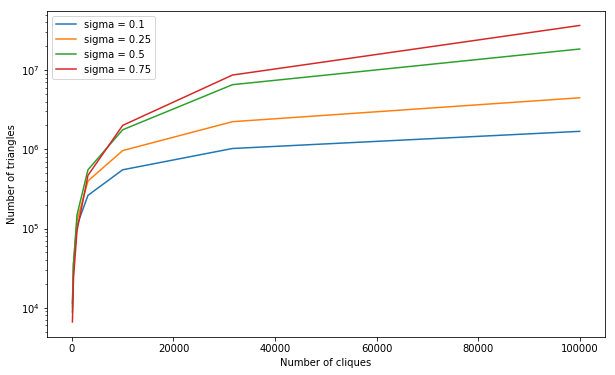

In [39]:
plt.figure(figsize=(10, 6))
Klist = [int(10 ** x) for x in np.linspace(2, 5, 7)]
cols = [(0.6,0.5,0.5), (0.7,0.4,0.4), (0.8,0.3,0.3), (0.9,0.2,0.2), 'black']
for i, sigma in enumerate(sigma_list):
    num_triang, mean_triang, clust_coeff, num_nodes, num_edges, mean_deg = models[i]
    y = num_triang.mean(axis=1)
    s = num_triang.std(axis=1)
    x = Klist # num_edges.mean(axis=1)
    plt.plot(x, y, label="sigma = {}".format(sigma))
#     plt.fill_between(x, y1=y-s,y2=y+s, alpha=0.3, label="sigma = {}".format(sigma))
plt.legend(loc="upper left")
plt.xlabel("Number of cliques")
plt.ylabel("Number of triangles")
# plt.xscale('log')
plt.yscale('log')
plt.show()

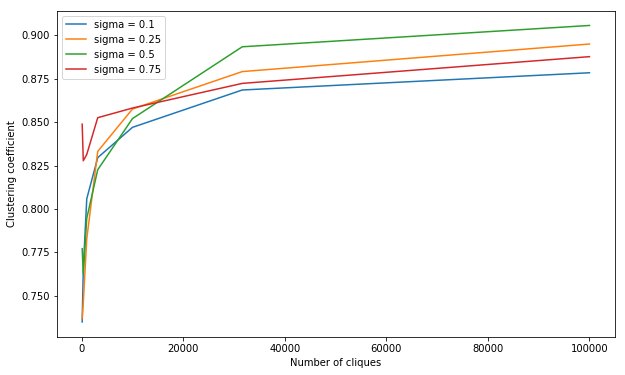

In [43]:
plt.figure(figsize=(10, 6))
Klist = [int(10 ** x) for x in np.linspace(2, 5, 7)]
cols = [(0.6,0.5,0.5), (0.7,0.4,0.4), (0.8,0.3,0.3), (0.9,0.2,0.2), 'black']
for i, sigma in enumerate(sigma_list):
    num_triang, mean_triang, clust_coeff, num_nodes, num_edges, mean_deg = models[i]
    y = clust_coeff.mean(axis=1)
    s = clust_coeff.std(axis=1)
    x = Klist # num_edges.mean(axis=1)
    plt.plot(x, y, label="sigma = {}".format(sigma))
#     plt.fill_between(x, y1=y-s,y2=y+s, alpha=0.3, label="sigma = {}".format(sigma))
plt.legend(loc="upper left")
plt.xlabel("Number of cliques")
plt.ylabel("Clustering coefficient")
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [53]:
alpha_list = [7.0]
sigma_list = [0.5]
c_list = [1.0, 5., 10.0, 100.]
Klist = [int(10 ** x) for x in np.linspace(2, 4.5, 6)]
nreps = 2

ans = {}

for i, alpha in enumerate(alpha_list):
    for j, sigma in enumerate(sigma_list):
        for l, c in enumerate(c_list):
            print("====== alpha = {}  sigma = {}  c = {}".format(alpha, sigma, c))
            num_triang, mean_triang, clust_coeff, num_nodes, num_edges, mean_deg = generate_stats(Klist, nreps, alpha, sigma, c)
            ans[(i, j, l)] = (num_triang, mean_triang, clust_coeff, num_nodes, num_edges, mean_deg)

====== alpha = 7.0  sigma = 0.5  c = 1.0
Finished rep  1 with K:    100 nt:   20250  mt:  138.70 cc: 0.81 nv:    146 ne:    1397 deg: 19.14
Finished rep  1 with K:    316 nt:   72639  mt:  252.22 cc: 0.82 nv:    288 ne:    3404 deg: 23.64
Finished rep  1 with K:   1000 nt:  125136  mt:  254.86 cc: 0.82 nv:    491 ne:    5624 deg: 22.91
Finished rep  1 with K:   3162 nt:  368217  mt:  431.67 cc: 0.83 nv:    853 ne:   10914 deg: 25.59
Finished rep  1 with K:  10000 nt: 1319820  mt:  855.91 cc: 0.89 nv:   1542 ne:   26904 deg: 34.89
Finished rep  1 with K:  31622 nt: 3529005  mt: 1280.95 cc: 0.93 nv:   2755 ne:   54536 deg: 39.59
Finished rep  2 with K:    100 nt:   15972  mt:  103.71 cc: 0.83 nv:    154 ne:    1258 deg: 16.34
Finished rep  2 with K:    316 nt:   78402  mt:  280.01 cc: 0.84 nv:    280 ne:    3606 deg: 25.76
Finished rep  2 with K:   1000 nt:  120687  mt:  241.86 cc: 0.84 nv:    499 ne:    5751 deg: 23.05
Finished rep  2 with K:   3162 nt:  452550  mt:  503.95 cc: 0.90 nv: